# Final Project - Aleks Neceski   Student Number:201851860

This project will serve to look at any disparity in pay between genders in Ontario by visualizing a variety of factors. It will investigate the size of the pay gap between genders in Ontario in recent history and see if there may be a basis for this gap due to differences in level of education or industry participation. 

Goal 1) How does Education Factor into wages? 

First we will look at the wage rate by gender, with side by side comparisons at each level of education. Next we will take a look at the numbers of males and females at each individual level of education, visualizing our sample and illustrating how many people fall into each of the categories described in our first visualization. With the information from both of these illustrations in hand, we will merge the two. By multiplying wage rates at each education level by proportions of each group at that education level, we will get an overarching picture of how the levels of education impact earning potential for each gender. This will also be compared to the actual average earnings and will be discussed.

Goal 2) How does Industry Factor into wages? 

The dataset we have contains Canada wide data, so our first step is to localize Canada wide data purely to Ontario. Then we will visualize the gender makeup of each industry's labour force by visualizing total employment levels of each gender in both the goods sector and in the servies sector. Taking the average wages by industry and visualizing male wage vs female wage is our next step. Lastly, we use a cross of the above information to visualize how each gender's participation in different industries corresponds to their overall pay. 

Please note that this project's purpose is not to make any sort of social commentary. It does not attempt to prove or disprove the existance of pay disparity by gender nor does it claim to portray the whole picture on the topic. It is merely looking at trends in data to see any correlation between education level or industry participation and any potential disparity in pay in Ontario.

The First DataSet to be analyzed will be Wages By Education Level taken from - https://data.ontario.ca/dataset/wages-by-education-level

# Education 

In [1]:
#import statements
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Read File Wages By Education Level 1997-2019
wage_by_edu_df = pd.read_csv("Wages By Education Level - 1997-2019.csv")
mask = (wage_by_edu_df['YEAR'] >= 2015) & (wage_by_edu_df['YEAR'] <= 2020) & (wage_by_edu_df['Geography'] == 'Ontario') & (wage_by_edu_df['Wages'] == "Average weekly wage rate")
wage_by_edu_df = wage_by_edu_df.loc[mask]

#Specify sub_df for both full and part time Wages by Year and Age group for 2019
mask = (wage_by_edu_df['YEAR'] == 2019) & (wage_by_edu_df['Type of work'] == '   Full-time ') & ((wage_by_edu_df['Age group'] == '25 years and over') | (wage_by_edu_df['Age group'] == '15 years and over '))
wages_2019_df = wage_by_edu_df.loc[mask]
# Both full- and part-time

#Get Levels of Education Detailed 
education_levels = wages_2019_df['Education level'].unique().tolist()
education_levels.remove('PSE  (5,6,7,8,9))')
education_levels.remove('No PSE  (0,1,2,3,4)')
age_groups = wages_2019_df['Age group'].unique().tolist()
    
#Get average wages for males 25+ given education level 
average_wages_male_25 = []
for education in education_levels: 
    mask = (wages_2019_df['Age group'] == '25 years and over') & (wages_2019_df['Education level'] == education)
    wages_for_edulvl = wages_2019_df.loc[mask]
    average_wages_male_25.append(wages_for_edulvl.iloc[0]['  Male'])
    
#Get average wages for females 25+ given education level 
average_wages_female_25 = []
for education in education_levels: 
    mask = (wages_2019_df['Age group'] == '25 years and over') & (wages_2019_df['Education level'] == education)
    wages_for_edulvl = wages_2019_df.loc[mask]
    average_wages_female_25.append(wages_for_edulvl.iloc[0]['  Female'])

#generate a new dataframe using above information to plot off of 

dict_info = {'Education Level' : education_levels, 
           'Average Wages Male 25+' : average_wages_male_25, 
           'Average Wages Female 25+' : average_wages_female_25
}

df_fig1 = pd.DataFrame(data=dict_info)

    
# wage_by_edu_df.head()
# wages_2019_df.head()
# wages_2019_df.columns
# df_fig1.head(20)
# df_fig1['Education Level'].unique().tolist()
# wage_by_edu_df['Type of work'].unique().tolist()


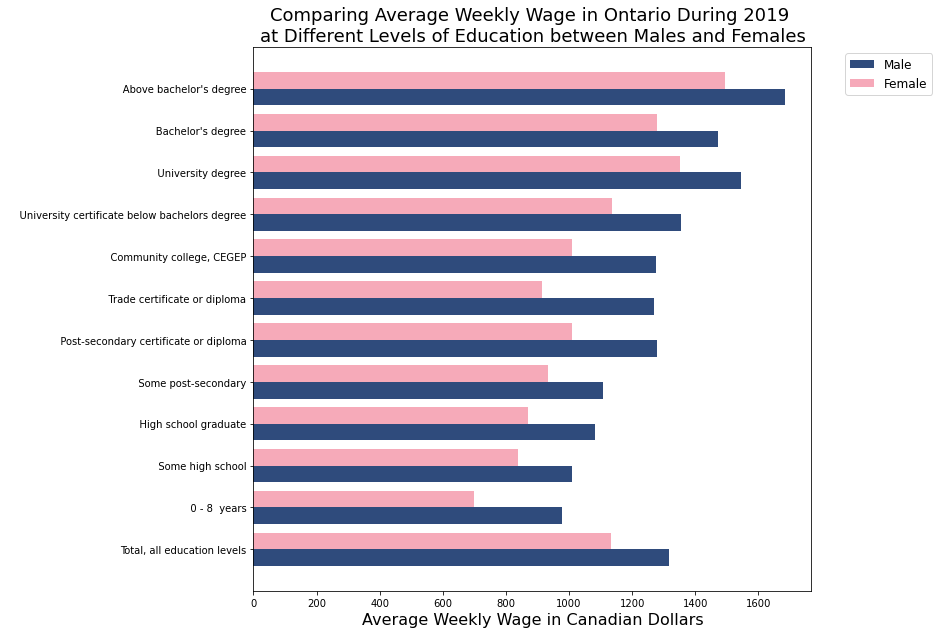

In [403]:
#visualize the data into a grouped bar plot

fig, ax = plt.subplots(figsize=(10, 10))

#setting positions and width for the bars
pos = list(range(len(education_levels)))
width = 0.4



plt.barh(pos, df_fig1['Average Wages Male 25+'], width, color='#2f4b7c', label="Average Wages Male 25+")
plt.barh([p + width for p in pos], df_fig1['Average Wages Female 25+'], width, alpha=0.5, color='#ef5675', label="Average Wages Female 25+")
# plt.barh([p + width*2 for p in pos], df_fig1['Average Wages Male 25+'], width, alpha=0.25, color='#0B0BFF', label="Average Wages Male 25+")
# plt.barh([p + width*3 for p in pos], df_fig1['Average Wages Female 25+'], width, alpha=0.25, color='#e75480', label="Average Wages Male 25+")

ax.set_yticks([p + 0.5* width for p in pos]) 
ax.set_yticklabels(df_fig1['Education Level'])

plt.title(label='Comparing Average Weekly Wage in Ontario During 2019 \nat Different Levels of Education between Males and Females', fontdict={'fontsize':"18"})
plt.legend(['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
ax.set_xlabel('Average Weekly Wage in Canadian Dollars', fontsize=16)

plt.show()

# print(average_wages_male_15)
# print(average_wages_male_25)
# print(average_wages_female_15)
# print(average_wages_female_25)

Figure 1: Here the average weekly wage of males and females in Ontario during 2019 is shown. From the data here it's clear that at every level of education there's a disparity in pay. 

The Next Data set to be analyzed is Labour Force Estimates By Education for 2015 to 2019 taken from https://data.ontario.ca/dataset/labour-force-estimates-by-education

In [4]:
labour_by_edu_df = pd.read_csv("Labour-Estimate-By-Education-2015-2019.csv")

In [5]:
#get the data for 2019 
mask = ((labour_by_edu_df['Timeseries'] == 'Jan2019') | (labour_by_edu_df['Timeseries'] == 'Feb2019') | 
        (labour_by_edu_df['Timeseries'] == 'Mar2019') | (labour_by_edu_df['Timeseries'] == 'Apr2019') |
        (labour_by_edu_df['Timeseries'] == 'May2019') | (labour_by_edu_df['Timeseries'] == 'Jun2019') |
        (labour_by_edu_df['Timeseries'] == 'Jul2019') | (labour_by_edu_df['Timeseries'] == 'Aug2019') |
        (labour_by_edu_df['Timeseries'] == 'Sep2019') | (labour_by_edu_df['Timeseries'] == 'Oct2019') |
        (labour_by_edu_df['Timeseries'] == 'Nov2019') | (labour_by_edu_df['Timeseries'] == 'Dec2019'))
labour_by_edu_2019 = labour_by_edu_df.loc[mask]
# Make check for all ages, 
ft_labour_by_edu_ontario = labour_by_edu_2019.loc[(labour_by_edu_2019['Prov'] == 'Ontario') & (labour_by_edu_2019['CHAR'] == 'Employed') &
                                                 (labour_by_edu_2019['Age'] == 'Total')]


In [6]:
# labour_by_edu_df = labour_by_edu_df.loc[mask]
education_levels2 = labour_by_edu_2019['Education'].unique().tolist()
education_levels2.remove('  No PSE  (0,1,2,3,4)')
education_levels2.remove('  Post-secondary certificate or diploma, (5 + 6 + 7)')
education_levels2.remove('Post-secondary education (5 to 9), ')
education_levels2.remove('  University degree (8+9)')

# get the average employment levels for men 
average_male = []
for education in education_levels2: 
    employment_for_edulvl = ft_labour_by_edu_ontario.loc[ft_labour_by_edu_ontario['Education'] == education]
    average_male.append(employment_for_edulvl['     Men'].mean())

#Create array without "total" value
average_male_no_total = average_male.copy()
avg_male_total = average_male_no_total.pop(0)
#Make copy of unsorted array for use later
avg_male_no_total_unsorted = average_male_no_total.copy()
#Sort Array
average_male_no_total.sort()

# get the average employment levels for men 
average_female = []
for education in education_levels2: 
    employment_for_edulvl = ft_labour_by_edu_ontario.loc[ft_labour_by_edu_ontario['Education'] == education]
    average_female.append(employment_for_edulvl['     Women'].mean())

#Create array without "total" value
average_female_no_total = average_female.copy()
avg_female_total = average_female_no_total.pop(0)
#Make copy of unsorted array for use later
avg_female_no_total_unsorted = average_female_no_total.copy()
#Sort Array
average_female_no_total.sort()

#Create education array without "total" string
education_levels_no_total = ['No High School', 'Certificate or Diploma below Bachelors', 'Some Post-Secondary', 'Trade Certificate', 'Some High School', 'Above Bachelor\'s', 
                             'High School', 'Bachelor\'s Degree', 'College Diploma']
education_levels_no_total_female = ['No High School', 'Certificate or Diploma below Bachelors', 'Trade Certificate', 'Some High School', "Some Post-Secondary",
                                   'Above Bachelor\'s', 'High School', 'Bachelor\'s Degree', 'College Diploma']

# labour = ft_labour_by_edu_ontario.loc[labour_by_edu_df['Education'] == education_levels[0]]
# labour = labour.drop_duplicates()

# print(len(average_male_no_total))



# education_levels_no_total_unsorted = education_levels
# education_levels_no_total_unsorted.pop(0)
# education_levels
# average_men
# average_female
# labour.columns
# labour.dtypes
# ft_labour_by_edu_ontario.head()
# labour_by_edu_df.dtypes

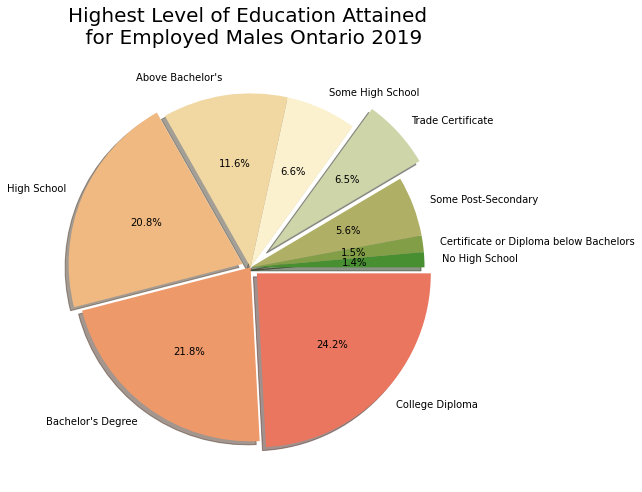

In [362]:
fig2, ax2 = plt.subplots(figsize=(8, 8))

clr1 = '#488f31'
clr2 = '#829f47'
clr3 = '#b0af66'
clr4 = '#ced5a9'
clr5 = '#fbf1ce'
clr6 = '#f1d7a1'
clr7 = '#efb981'
clr8 = '#ed996a'
clr9 = '#ea765f'

ax2.pie(average_male_no_total, labels = education_levels_no_total, autopct='%1.1f%%', startangle=0, shadow=True,
       colors = ['#488f31', '#829f47', '#b0af66', '#ced5a9', '#fbf1ce', '#f1d7a1', '#efb981', '#ed996a', '#ea765f'], 
       explode = (0, 0, 0, 0.15, 0, 0, 0.05, 0, 0.05))

plt.title('Highest Level of Education Attained \n for Employed Males Ontario 2019', fontsize=20)
plt.show()

Figure 2: Here the proportion of Males employed at each level of education, relative to the total amount of males employed, is shown. The popped elements are done so to show significant differences to the Female chart shown next. 

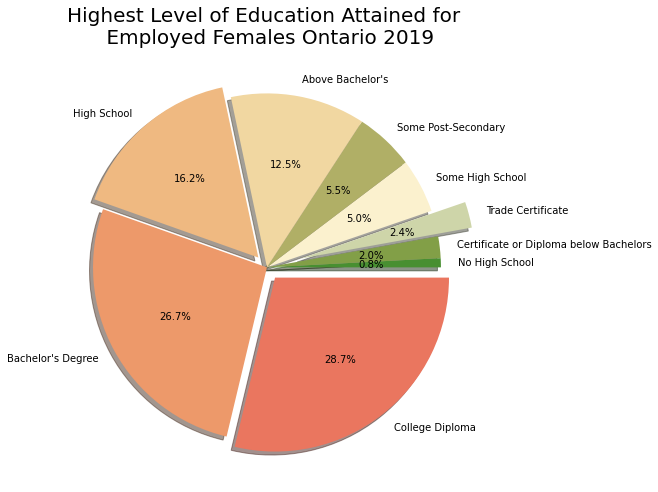

In [433]:
fig3, ax3 = plt.subplots(figsize=(8,8))

ax3.pie(average_female_no_total, labels = education_levels_no_total_female, autopct='%1.1f%%', startangle=0, shadow=True, 
        explode = (0, 0, 0.2, 0, 0, 0, 0.075, 0, 0.075), 
       colors = [clr1, clr2, clr4, clr5, clr3, clr6, clr7, clr8, clr9])

plt.title('Highest Level of Education Attained for \n Employed Females Ontario 2019', fontsize=20)

plt.show()

Figure 3: Here the proportion of Females employed at each level of education, relative to the total amount of females employed, is shown. Highlighting the largest changes by popping them slightly out of the graph, we can see that, compared the male chart, there is a higher proportion of the female working population with higher levels of education. More of the females who complete high school go on to complete post secondary education - which has a higher average weekly wage as was shown in figure 1. The exception to this is the trade certificate 

Since we've just established the makeup of the male and female labour force in Ontario by proportion to level of education, and we've previously established the average weekly income level of individuals at each level of education. Here we are going to demonstrate a weighted average of weekly income for both genders using the average weekly income of each level of education (we take the same value for both genders) crossed by the weight of each gender's population for that education level and make a comparison of this value to the actual average income by gender. 

In [419]:
#Variables average_male_no_total, average_female_no_total, average_male_total, average_female_total,
#education_levels, education_levels2, average_wages_male_25, average_wages_female_25

average_wages_male_trimmed = average_wages_male_25[1:6] + average_wages_male_25[8:]
average_wages_female_trimmed = average_wages_female_25[1:6] + average_wages_female_25[8:]

average_wage = []
for i in range(len(average_wages_male_trimmed)):
    average_wage.append((average_wages_male_trimmed[i] + average_wages_female_trimmed[i])/2)

labour_makeup_male = []
for i in range(len(average_wages_male_trimmed)): 
    labour_makeup_male.append(avg_male_no_total_unsorted[i]/avg_male_total)
    
labour_makeup_female = []
for i in range(len(average_wages_female_trimmed)): 
    labour_makeup_female.append(avg_female_no_total_unsorted[i]/avg_female_total)
    
weighted_wage_male = 0
for i in range(len(average_wages_male_trimmed)):
    weighted_wage_male += average_wage[i]*labour_makeup_male[i]
    
weighted_wage_female = 0
for i in range(len(average_wages_female_trimmed)):
    weighted_wage_female += average_wage[i]*labour_makeup_female[i]

weighted_wage_male = round(weighted_wage_male, 2)
weighted_wage_female = round(weighted_wage_female, 2)


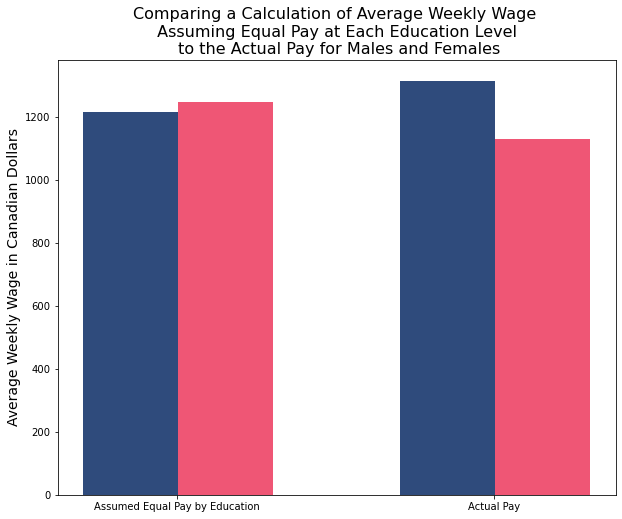

In [420]:
#plot graph

width = 0.3
fig5, ax5 = plt.subplots(figsize=(10, 8))

plt.bar([0, 1], [weighted_wage_male, average_wages_male_25[0]], width, color='#2f4b7c')
plt.bar([width, width+1], [weighted_wage_female, average_wages_female_25[0]], width, color='#ef5675')

ax5.set_xticks([0.145, 1.145])
ax5.set_xticklabels(['Assumed Equal Pay by Education', 'Actual Pay'])
plt.title('Comparing a Calculation of Average Weekly Wage \n Assuming Equal Pay at Each Education Level \n to the Actual Pay for Males and Females', fontsize=16)

ax5.set_ylabel('Average Weekly Wage in Canadian Dollars', fontsize=14)
plt.show()

Figure 5: Taking the average of the wage results and paying both males and females equally at each level of education results in the bar graph on the left, relative to the values for actual pay on the right. There may be other factors at play, but there's a disconnect between what equal pay for education looks like and what the actual rate of pay looks like. 

# Labour Force

Data taken on male vs female employment is obtained from statsCanada at https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410002301&pickMembers%5B0%5D=1.1&pickMembers%5B1%5D=2.2&pickMembers%5B2%5D=4.3&pickMembers%5B3%5D=5.1&cubeTimeFrame.startYear=2016&cubeTimeFrame.endYear=2020&referencePeriods=20160101%2C20200101

In [149]:
#import dataset 
female_labour_force = pd.read_csv("Female-Employment-Ontario-2019.csv")
male_labour_force = pd.read_csv("Male-Employment-Ontario-2019.csv")

industries = female_labour_force['Industries'].unique().tolist()

#Define masks for different industry categories for female
fmask_total = (female_labour_force['Industries'] == industries[0])
fmask_goods_producing_sector = (female_labour_force['Industries'] == industries[1])
fmask_goods_producing_sub_sectors = ((female_labour_force['Industries'] == industries[2]) | (female_labour_force['Industries'] == industries[3]) | 
                              (female_labour_force['Industries'] == industries[7]) | (female_labour_force['Industries'] == industries[8]) |
                              (female_labour_force['Industries'] == industries[9]))
fmask_services_producing_sector = (female_labour_force['Industries'] == industries[12])
fmask_services_producing_sub_sectors = ((female_labour_force['Industries'] == industries[13]) | (female_labour_force['Industries'] == industries[16]) |
                                      (female_labour_force['Industries'] == industries[17]) | (female_labour_force['Industries'] == industries[20]) |
                                      (female_labour_force['Industries'] == industries[21]) | (female_labour_force['Industries'] == industries[22]) | 
                                      (female_labour_force['Industries'] == industries[23]) | (female_labour_force['Industries'] == industries[24]) |
                                      (female_labour_force['Industries'] == industries[25]) | (female_labour_force['Industries'] == industries[26]) | 
                                      (female_labour_force['Industries'] == industries[27]))

#Define subsets for female
df_ftotal = female_labour_force.loc[fmask_total]
df_fgoods_producing_sector = female_labour_force.loc[fmask_goods_producing_sector]
df_fgoods_producing_sub_sector = female_labour_force.loc[fmask_goods_producing_sub_sectors]
df_fservices_producing_sector = female_labour_force.loc[fmask_services_producing_sector]
df_fservices_producing_sub_sector = female_labour_force.loc[fmask_services_producing_sub_sectors]

#Define masks for different industry categories for male
mmask_total = (male_labour_force['Industries'] == industries[0])
mmask_goods_producing_sector = (male_labour_force['Industries'] == industries[1])
mmask_goods_producing_sub_sectors = ((male_labour_force['Industries'] == industries[2]) | (male_labour_force['Industries'] == industries[3]) | 
                              (male_labour_force['Industries'] == industries[7]) | (male_labour_force['Industries'] == industries[8]) |
                              (male_labour_force['Industries'] == industries[9]))
mmask_services_producing_sector = (male_labour_force['Industries'] == industries[12])
mmask_services_producing_sub_sectors = ((male_labour_force['Industries'] == industries[13]) | (male_labour_force['Industries'] == industries[16]) |
                                      (male_labour_force['Industries'] == industries[17]) | (male_labour_force['Industries'] == industries[20]) |
                                      (male_labour_force['Industries'] == industries[21]) | (male_labour_force['Industries'] == industries[22]) | 
                                      (male_labour_force['Industries'] == industries[23]) | (male_labour_force['Industries'] == industries[24]) |
                                      (male_labour_force['Industries'] == industries[25]) | (male_labour_force['Industries'] == industries[26]) | 
                                      (male_labour_force['Industries'] == industries[27]))


#Define subsets for male
df_mtotal = male_labour_force.loc[mmask_total]
df_mgoods_producing_sector = male_labour_force.loc[mmask_goods_producing_sector]
df_mgoods_producing_sub_sector = male_labour_force.loc[mmask_goods_producing_sub_sectors]
df_mservices_producing_sector = male_labour_force.loc[mmask_services_producing_sector]
df_mservices_producing_sub_sector = male_labour_force.loc[mmask_services_producing_sub_sectors]

industries 
# female_labour_force.head()
df_goods_producing_sector.columns

Index(['Industries', 'Persons'], dtype='object')

In [206]:
def stringarraytofloatarray(array):
    newarray = [i.replace(',', '') for i in array]
    newarray = [float(i) for i in newarray]
    return newarray

male_employment = df_mtotal['Persons'].unique().tolist()
male_employment = stringarraytofloatarray(male_employment)

male_goods_producing_employment = df_mgoods_producing_sub_sector['Persons'].unique().tolist()
male_goods_producing_employment = stringarraytofloatarray(male_goods_producing_employment)

male_services_producing_employment = df_mservices_producing_sub_sector['Persons'].unique().tolist()
male_services_producing_employment = stringarraytofloatarray(male_services_producing_employment)

female_employment = df_ftotal['Persons'].unique().tolist()
female_employment = stringarraytofloatarray(female_employment)

female_goods_producing_employment = df_fgoods_producing_sub_sector['Persons'].unique().tolist()
female_goods_producing_employment = stringarraytofloatarray(female_goods_producing_employment)

female_services_producing_employment = df_fservices_producing_sub_sector['Persons'].unique().tolist()
female_services_producing_employment = stringarraytofloatarray(female_services_producing_employment)

print(male_employment)
# print(male_goods_producing_employment)
print(male_services_producing_employment)
# print(female_employment)
# print(df_mservices_producing_sub_sector['Industries'].unique().tolist())
print(female_goods_producing_employment)
print(female_services_producing_employment)

[3874.7]
[572.8, 301.8, 287.0, 389.6, 168.8, 167.6, 174.0, 154.3, 204.6, 128.1, 190.3]
[26.9, 4.6, 11.9, 62.4, 225.5]
[511.3, 93.9, 303.5, 278.4, 143.8, 373.2, 726.4, 142.5, 244.3, 170.8, 182.8]


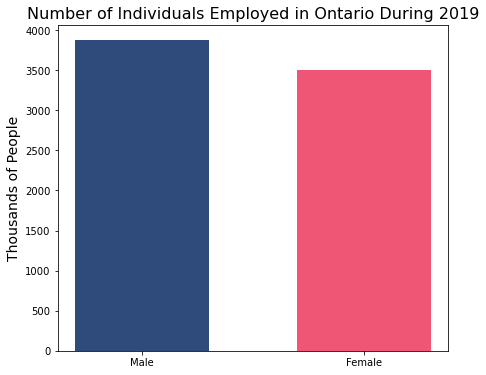

In [424]:

def height(index, array): 
    return sum(array[0:index])

#add in function to pass in color array
def plotstackedbar(position, array, width, colors):
    for i in range(len(array)):
        plt.bar([position], [array[i]], width, bottom=height(i, array), color=colors[i])
        
#plot total employment 
width = 0.3
colors = ['#2f4b7c']
fig6, ax6 = plt.subplots(figsize=(7, 6))

plotstackedbar(1, male_employment, width, colors)
colors = ['#ef5675']
plotstackedbar(1.5, female_employment, width, colors)

plt.title('Number of Individuals Employed in Ontario During 2019', fontsize=16)
ax6.set_ylabel('Thousands of People', fontsize = 14)

ax6.set_xticks([1, 1.5])
ax6.set_xticklabels(['Male', 'Female'])

plt.show()

Figure 6: Showing the amount of males in the work force, the higher proportion of males is likely due to the higher cultural acceptance and rates of stay at home mothers compared to stay at home fathers in single earner families. It may also be caused by pregnancy and maternity leave, though it's unclear whether parents on parental leave are counted or discounted from the employed members of the labour force. 

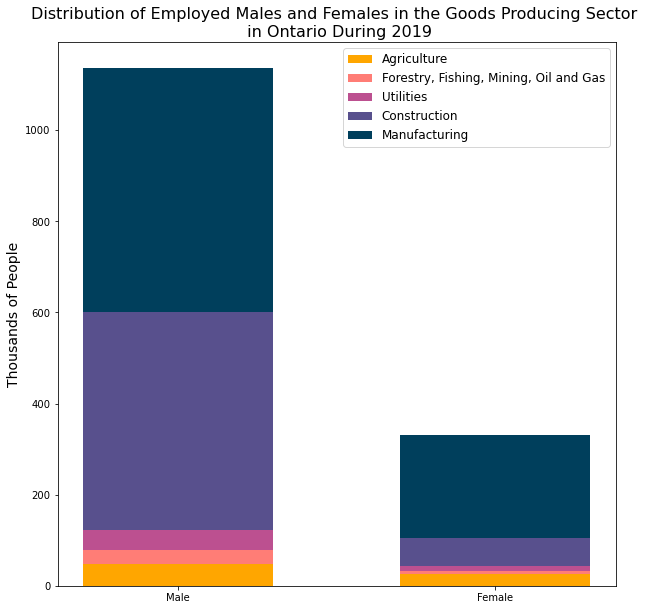

In [396]:
#plot the bar graph
width = 0.3
colors1 = ['#003f5c', '#58508d', '#bc5090', '#ff7d76', '#ffa600']
colors1.reverse()
fig7, ax7 = plt.subplots(figsize=(10, 10))

#plot goods sector

#male side
plotstackedbar(1, male_goods_producing_employment, width, colors1)
# #Agriculture at base
# #forestry, fishing, mining, quarrying, oil and gas
# #Utilities
# #Construction
# #Manufacturing


#female side
plotstackedbar(1.5, female_goods_producing_employment, width, colors1)
# #Agriculture at base
# #forestry, fishing, mining, quarrying, oil and gas
# #Utilities
# #Construction
# #Manufacturing

legend_array = ['Agriculture', 'Forestry, Fishing, Mining, Oil and Gas', 'Utilities', 'Construction', 'Manufacturing']
plt.legend(legend_array, loc='upper right', fontsize='large')

ax7.set_ylabel('Thousands of People', fontsize=14)
ax7.set_xticks([1, 1.5])
ax7.set_xticklabels(['Male', 'Female'])

plt.title('Distribution of Employed Males and Females in the Goods Producing Sector \n in Ontario During 2019', fontsize=16)

plt.show()

Figure 7: A showcase of the large amount more males in the goods producing sector than in the services producing sector. 

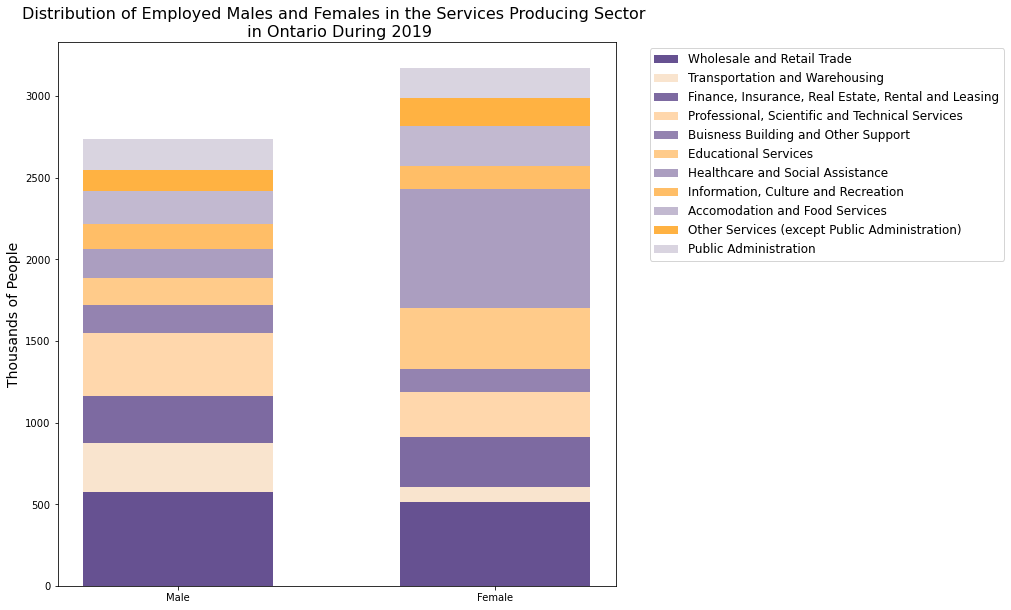

In [397]:

# colors2 = ['#0b032d', '#363152', '#645f7a', '#9591a5', '#c9c7d1', '#ffdeff', '#ffded5', '#ffbead', '#ff9d86', 
#           '#f77a60', "#ed553b"]
# colors2 = ['#003f5c', '#8093a3', '#ffcb8a', '#ffa600', '#daa2bf', '#bc5090', 
#            '#ea937f', '#b80f0a', '#7f978b', '#043927', '#9fcbdc']
colors2 = ['#665191', '#f9e4ce', '#7d6aa1', '#ffd7ac', '#9483b0', '#ffcb8a',
          '#ab9ec0', '#ffbe67', '#c2b9d0', '#ffb242', '#d9d4e0']
fig8, ax8 = plt.subplots(figsize=(10, 10))
#plot services sector

#male side 
plotstackedbar(1, male_services_producing_employment, width, colors2)
#Wholesale and retail trade
#Transportation and warehousing
#Finance, insurance, real estate, rental and leasing
#Professional, scientific and technical services
#buisness building and other support 
#educational services
# Healthcare and social assistance
# Information, culture and recreation
# Accomodation and food services
# Other services (except public administration)
# Public administration

#female side
plotstackedbar(1.5, female_services_producing_employment, width, colors2)
#Wholesale and retail trade
#Transportation and warehousing
#Finance, insurance, real estate, rental and leasing
#Professional, scientific and technical services
#buisness building and other support 
#educational services
# Healthcare and social assistance
# Information, culture and recreation
# Accomodation and food services
# Other services (except public administration)
# Public administration

legend_array = ['Wholesale and Retail Trade', 'Transportation and Warehousing', 
                'Finance, Insurance, Real Estate, Rental and Leasing', 'Professional, Scientific and Technical Services',
               'Buisness Building and Other Support', 'Educational Services', 
               'Healthcare and Social Assistance', 'Information, Culture and Recreation',
               'Accomodation and Food Services', 'Other Services (except Public Administration)', 'Public Administration']
plt.legend(legend_array, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
ax8.set_ylabel('Thousands of People', fontsize=14)
ax8.set_xticks([1, 1.5])
ax8.set_xticklabels(['Male', 'Female'])

plt.title('Distribution of Employed Males and Females in the Services Producing Sector \n in Ontario During 2019', fontsize=16)

plt.show()

Figure 8: Showing the proportions of males and females in the Services Producing sector. A lot of these categories tend to be a  more similar than the previous figure, but there's a very notable difference in the Healthcare sector - predominantly female and the Transportation and Warehousing industry - predominantly male. 

Now we ivestigate Wage Rates by Industry - Pulling information from data on Employee Wages by Industry available here - https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410006401

In [337]:
industry_wages_female = pd.read_csv("average-wage-by-ind-female.csv")
industry_wages_male = pd.read_csv("average-wage-by-ind-male.csv")
industry_wages_both = pd.read_csv('average-wage-by-ind-both.csv')

industries = industry_wages_both['Industry'].unique().tolist()


def createOrMask(dataframe, columnname, array, indexarray): 
    mask = (dataframe[columnname] == array[indexarray[0]])
    for i in indexarray: 
        mask = mask | (dataframe[columnname] == array[i])
    return mask

#create list of indices for the goods and services sectors
goods_sector_indices = [i for i in range(2, 7)]
services_sector_indices = [i for i in range(8, 19)]

# Create ordered arrays for the values
male_goods_wages = industry_wages_male['Wage'].loc[
    createOrMask(industry_wages_male, 'Industry', industries, goods_sector_indices)].unique().tolist()
male_goods_wages = stringarraytofloatarray(male_goods_wages)

male_services_wages = industry_wages_male['Wage'].loc[
    createOrMask(industry_wages_male, 'Industry', industries, services_sector_indices)].unique().tolist()
male_services_wages = stringarraytofloatarray(male_services_wages)

female_goods_wages = industry_wages_female['Wage'].loc[
    createOrMask(industry_wages_female, 'Industry', industries, goods_sector_indices)].unique().tolist()
female_goods_wages = stringarraytofloatarray(female_goods_wages)

female_services_wages = industry_wages_female['Wage'].loc[
    createOrMask(industry_wages_female, 'Industry', industries, services_sector_indices)].unique().tolist()
female_services_wages = stringarraytofloatarray(female_services_wages)

industry_goods_wages = industry_wages_both['Wage'].loc[
    createOrMask(industry_wages_both, 'Industry', industries, goods_sector_indices)].unique().tolist()
industry_goods_wages = stringarraytofloatarray(industry_goods_wages)

industry_services_wages = industry_wages_both['Wage'].loc[
    createOrMask(industry_wages_both, 'Industry', industries, services_sector_indices)].unique().tolist()
industry_services_wages = stringarraytofloatarray(industry_services_wages)


goods_dict = {
    'Industries': ['Agriculture', 'Forestry, Fishing, Mining, Oil and Gas', 'Utilities', 'Construction', 'Manufacturing'],
    'Male': male_goods_wages,
    'Female': female_goods_wages
}
services_dict = {
    'Industries': ['Wholesale and Retail Trade', 'Transportation and Warehousing', 
                'Finance, Insurance, Real Estate, Rental and Leasing', 'Professional, Scientific and Technical Services',
               'Buisness Building and Other Support', 'Educational Services', 
               'Healthcare and Social Assistance', 'Information, Culture and Recreation',
               'Accomodation and Food Services', 'Other Services (except Public Administration)', 'Public Administration'],
    'Male': male_services_wages,
    'Female': female_services_wages
}
goods_df = pd.DataFrame(goods_dict)
services_df = pd.DataFrame(services_dict)

goods_df = goods_df.sort_values('Male')
services_df = services_df.sort_values('Male')


male_wages = goods_df['Male'].unique().tolist() + services_df['Male'].unique().tolist()
female_wages = goods_df['Female'].unique().tolist() + services_df['Female'].unique().tolist()
industries_goods_services_ordered = goods_df['Industries'].unique().tolist() + services_df['Industries'].unique().tolist()


print(male_wages)
print(female_wages)
# goods_df.head(20)
# services_df.head(20)
# print(len(goods_sector_indices))
# print(len(male_goods_wages))
# print(male_goods_wages)
# print(len(female_goods_wages))
# # male_wages
# male_services_wages_df.head()
# print(mask)
# industry_wages_male.loc[mask]
# industry_wages_male.columns
# print(goods_sector_indices)

[876.71, 1149.59, 1238.9, 1572.75, 1699.43, 542.3, 859.63, 863.53, 984.53, 999.88, 1058.4, 1161.72, 1289.35, 1409.23, 1549.57, 1550.2]
[635.53, 973.8, 942.6, 1438.0, 1459.64, 447.26, 723.64, 644.44, 799.52, 794.4, 821.24, 948.83, 1126.38, 1157.39, 1393.58, 1189.27]


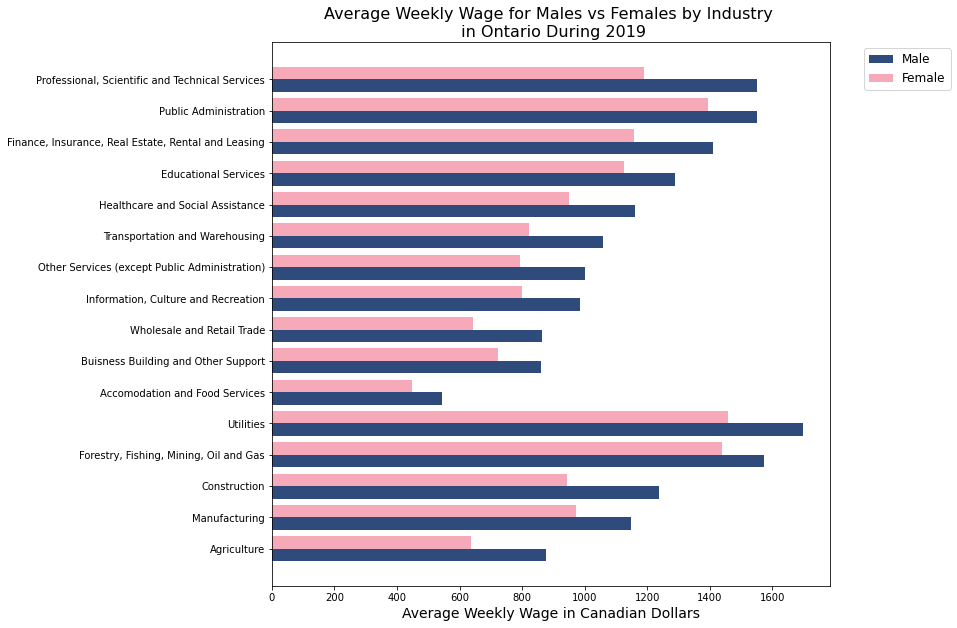

In [402]:
# Create Plots
pos = [i for i in range(len(male_wages))]
width = 0.4
fig9, ax9 = plt.subplots(figsize=(10, 10)) 

plt.barh(pos, male_wages, width, color='#2f4b7c')
plt.barh([p + width for p in pos], female_wages, width, alpha=0.5, color='#ef5675')
plt.title('')

ax9.set_yticks([p + 0.5* width for p in pos])
ax9.set_yticklabels(industries_goods_services_ordered)
ax9.set_xlabel('Average Weekly Wage in Canadian Dollars', fontsize=14)

plt.title('Average Weekly Wage for Males vs Females by Industry \n in Ontario During 2019', fontsize = 16)
plt.legend(['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

plt.show()

Figure 9: Looking at the average weekly wage rates by Industry, it's clear that within every industry, males have a higher weekly wage. 

In [351]:
def weightedAvgList(list):
    to_return = []
    total = sum(list)
    for item in list: 
        to_return.append(item/total)
    return to_return

def productSumLists(list1, list2):
    to_return = 0
    for i in range(len(list1)):
        to_return += list1[i]*list2[i]
    return to_return

#Add together for ease of use
male_proportion = male_goods_producing_employment + male_services_producing_employment
female_proportion = female_goods_producing_employment + female_services_producing_employment


#industry proportions of employment
male_proportion_weighted = weightedAvgList(male_proportion)
female_proportion_weighted =  weightedAvgList(female_proportion)
#get wages with order corresponding order
wages_corresponding_order = industry_goods_wages + industry_services_wages

male_pay_given_equal_wage = productSumLists(wages_corresponding_order, male_proportion_weighted)
female_pay_given_equal_wage = productSumLists(wages_corresponding_order, female_proportion_weighted)

actual_pay = [industry_wages_male.iloc[0]['Wage'], industry_wages_female.iloc[0]['Wage']]
actual_pay = stringarraytofloatarray(actual_pay)

print(male_pay_given_equal_wage)
print(female_pay_given_equal_wage)


# print(male_proportion_weighted)

1056.4081248548348
1016.712054422934


1140.71

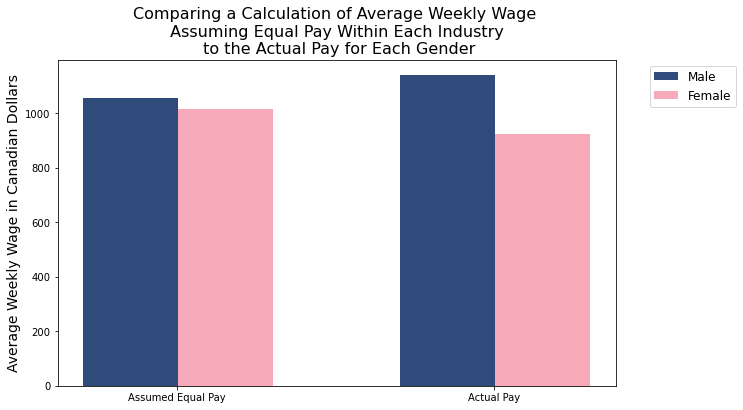

In [418]:
#plot graph

width = 0.3
fig10, ax10 = plt.subplots(figsize=(10, 6))

plt.bar([0, 1], [male_pay_given_equal_wage, actual_pay[0]], width, color='#2f4b7c')
plt.bar([width, width+1], [female_pay_given_equal_wage, actual_pay[1]], width, alpha=0.5, color='#ef5675')

ax10.set_xticks([0.145, 1.145])
ax10.set_xticklabels(['Assumed Equal Pay', 'Actual Pay'])
ax10.set_ylabel('Average Weekly Wage in Canadian Dollars', fontsize=14)

plt.legend(['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
plt.title('Comparing a Calculation of Average Weekly Wage \n Assuming Equal Pay Within Each Industry \n to the Actual Pay for Each Gender', fontsize=16)


plt.show()

Figure 10: Taking an assumed equal wage within each industry, but taking a weighted average of distributions of males and females into respective industries yields a slightly higher pay for males. Comparing this to the actual pay values recorded on stats Canada, we again see the stark difference. 

# Conclusions

While this project does not take a deep dive into potential reasons for the pay disparity between males and females, instead electing to take a cursory, surface-level approach to convey recent information on the topic in Ontario. We've illustrated that there is a definite pay gap between males and females, regardless of education or industry participation. At every level in both males had a noticeably higher rate of pay. When making comparisons on the proportions of males and females at different levels of education, pay proportionate solely to education yielded a higher rate of pay on average for females. While making comparisons on the proportions of males and females within different industries, pay proportionate solely to industry yielded a higher rate of pay for males. 

While the reasoning for the pay disparity was not analyzed, it was made clear that it does not exist on the basis of difference in education or on the rates of participation in different industries. 